In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import seaborn as sns

In [4]:
train = pd.read_csv(r"/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv(r"/kaggle/input/digit-recognizer/test.csv")

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


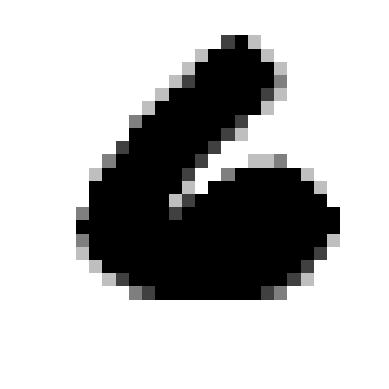

In [77]:
plt.imshow(X_train[500],cmap='binary')
plt.axis("off")
plt.show()

In [13]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']


In [14]:
X_train.shape, y_train.shape, test.shape

((42000, 784), (42000,), (28000, 784))

In [15]:
X_train.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
X_train = X_train.values.reshape(-1,28,28,1)
X_train = X_train / 255
test = test.values.reshape(-1,28,28,1)
test = test / 255


In [17]:
X_train.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [18]:
y_train = tf.keras.utils.to_categorical(y_train)
y_train.shape

(42000, 10)

In [20]:
print(train['label'].head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [21]:
print(y_train[0:6,:])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [37]:
model_clf = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="Same"),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="Same"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="Same"),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",padding="Same"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu',name="hiddenlayer1"),
    tf.keras.layers.Dense(256,activation='relu',name="hiddenlayer2"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")
])

In [38]:
model_clf.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                     

In [47]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('accuracy') > 0.999):
            print("\nreached 99.9% accuracy so cancelling training")
            self.model.stop_training = True
callbacks = mycallback()

In [45]:
Optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.0005,
    beta_1=0.9,
    beta_2 = 0.999,
    epsilon = 1e-07,
    name="Adam"
)

In [49]:
model_clf.compile(optimizer = Optimizer, loss="categorical_crossentropy",metrics=['accuracy'])
model_clf.fit(X_train,y_train,batch_size = 50, epochs = 20, callbacks=[callbacks])

Epoch 1/20
840/840 [==============================] - 111s 130ms/step - loss: 0.0845 - accuracy: 0.9741
Epoch 2/20
840/840 [==============================] - 107s 128ms/step - loss: 0.0530 - accuracy: 0.9841
Epoch 3/20
840/840 [==============================] - 106s 127ms/step - loss: 0.0405 - accuracy: 0.9875
Epoch 4/20
840/840 [==============================] - 108s 128ms/step - loss: 0.0329 - accuracy: 0.9898
Epoch 5/20
840/840 [==============================] - 108s 129ms/step - loss: 0.0272 - accuracy: 0.9915
Epoch 6/20
840/840 [==============================] - 108s 129ms/step - loss: 0.0248 - accuracy: 0.9921
Epoch 7/20
840/840 [==============================] - 107s 128ms/step - loss: 0.0196 - accuracy: 0.9939
Epoch 8/20
840/840 [==============================] - 110s 131ms/step - loss: 0.0186 - accuracy: 0.9942
Epoch 9/20
840/840 [==============================] - 108s 128ms/step - loss: 0.0162 - accuracy: 0.9947
Epoch 10/20
840/840 [==============================] - 107s 127m

In [51]:
results = model_clf.predict(test)

875/875 [==============================] - 19s 22ms/step


In [65]:
result = results.astype(int).tolist()

In [60]:
#results = np.argmax(results,axis=1)
results = pd.Series(result,name='Label')

In [67]:
# Sample
sample = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
sample['Label'] = result
sample.to_csv('/kaggle/working/submission.csv', index=False)

In [71]:
pd.read_csv(r'/kaggle/working/submission.csv').head(3)

,ImageId,Label
0,1,2
1,2,0
2,3,9


In [72]:
pd.read_csv(r"/kaggle/input/digit-recognizer/sample_submission.csv").head(3)

,ImageId,Label
0,1,0
1,2,0
2,3,0


In [85]:
 submit -c digit recognizer -f submission.csv -m "Submited"

SyntaxError: invalid syntax (328643109.py, line 1)